# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [22]:
import pandas as pd
import numpy as np
import math as math

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [23]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

array([32776.08120387,   536.6371859 ])

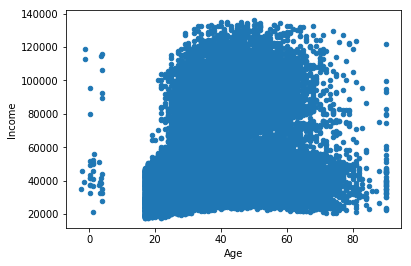

In [117]:
import math
income.plot(x='Age', y='Income', kind='scatter')
income.corr()

y = income['Income'].values
X = income['Age'].values

X_ = np.c_[np.ones(n_samples), X]
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
beta

Tanto la gráfica como el coeficiente de correlación, muestran que hay una relación positiva pero débil entre la edad y el ingreso de las personas. De hecho, por un aumento de una unidad en los años, en promedio el ingreso se incrementa en 536 dólares.

In [104]:
from sklearn.linear_model import LinearRegression

y = income['Income'].values
X = income['Age'].values

X_ = np.c_[np.ones(n_samples), X]

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_,y)
linreg.coef_

y_pred1 = linreg.predict(np.c_[1, np.array([40]).reshape(1, -1)])

y_pred2 = linreg.predict(np.c_[1, np.array([44.44]).reshape(1, -1)])

print("Para una persona de 30 años, el ingreso en promedio es de ", y_pred1)
print("Para una persona de 40 años, el ingreso en promedio es de ", y_pred2)


Para una persona de 30 años, el ingreso en promedio es de  [54241.56863972]
Para una persona de 40 años, el ingreso en promedio es de  [56624.2377451]


# Exercise 4.2
Evaluate the model using the MSE

In [105]:
from sklearn import metrics
import numpy as np

y_pred = linreg.predict(X_)
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

MSE: 594469899.656102



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [106]:
income["Age2"] = income['Age'] ** 2

X = income[['Age', 'Age2']].values

X_ = np.c_[np.ones(n_samples), X]

beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
beta


array([-12204.40261588,   2938.2217308 ,    -28.4397903 ])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [107]:
y = income['Income'].values
X = income[['Age', 'Hours per week', 'Age2']].values

linreg =LinearRegression()
linreg.fit(X,y)
linreg.coef_

y_pred = linreg.predict(X)

print('Mean Squared Error:', metrics.mean_squared_error(income['Income'], y_pred)) 


Mean Squared Error: 526936398.8030533


Se observa que se reduce el MSE incuyendo las dos variables adicionales. Lo cual indica que se reduce en promedio el error de la predicción. 

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [95]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [96]:
data["Churn?"].value_counts()
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [108]:
a = 100 * data["Churn?"].value_counts() / len(data["Churn?"])
a


False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

Aproximadamente el 15% de los clientes del servicio de telefonía desertan.

In [110]:
data["Churn?"].replace(['False.','True.'],['0','1'], inplace = True)

In [111]:
data.columns.values.tolist()

y = data["Churn?"]
X = data[["Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls", "Night Charge"]]

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]


# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [113]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))


[[862   0]
 [137   1]]
Train/Test split results:
LogisticRegression accuracy is 0.863
